<a href="https://colab.research.google.com/github/suryatejabatchu08/Machine-Learning-Lab/blob/main/Lab7_AP23110010549.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Download the Dataset

In [1]:
!gdown 1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2

Downloading...
From: https://drive.google.com/uc?id=1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2
To: /content/multiclass.csv
100% 14.6k/14.6k [00:00<00:00, 36.4MB/s]


### Importing Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

### Import the Dataset

In [3]:
df = pd.read_csv('/content/multiclass.csv')

### Data Preprocessing

In [4]:
df.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
0,3,12669,9656,7561,214,2674,1338,2
1,3,7057,9810,9568,1762,3293,1776,2
2,3,6353,8808,7684,2405,3516,7844,2
3,3,13265,1196,4221,6404,507,1788,1
4,3,22615,5410,7198,3915,1777,5185,1


In [5]:
df.shape

(440, 8)

### Check for NULL Values

In [6]:
df.isna().sum()

,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0
class,0


No NULL Values

### Scaling the Features (MinMax Scaler)

In [7]:
# Definining MinMax Scaler
def minmax(x, min, max):
  return (x-min)/(max-min)

In [8]:
# Select the features to scale
features_to_scale = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Create a copy of the dataframe to store scaled features
df_scaled = df.copy()

# Apply the minmax scaler to the selected features
for feature in features_to_scale:
  df_scaled[feature] = df[feature].apply(lambda x: minmax(x, df[feature].min(), df[feature].max()))

display(df_scaled.head())

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
0,3,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847,2
1,3,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984,2
2,3,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559,2
3,3,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234,1
4,3,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093,1


### Train - Test Split (80-20)

In [9]:
# Assuming 'class' is your target variable
X = df_scaled.drop('class', axis=1)
y = df_scaled['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (352, 7)
Testing data shape: (88, 7)


In [10]:
X_train

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
266,1,0.005074,0.132184,0.239057,0.036092,0.119513,0.053400
294,2,0.189660,0.026660,0.070567,0.014529,0.019792,0.038611
31,3,0.023264,0.058331,0.033737,0.033906,0.020013,0.020484
84,3,0.105789,0.044552,0.051856,0.018950,0.093915,0.002441
301,2,0.047081,0.180562,0.219839,0.029321,0.214310,0.003525
...,...,...,...,...,...,...,...
106,3,0.012938,0.085536,0.115341,0.001775,0.167230,0.038131
270,1,0.042060,0.013303,0.010477,0.089984,0.004752,0.001106
348,3,0.030540,0.031657,0.021827,0.021629,0.028929,0.013809
435,3,0.264829,0.163338,0.172715,0.215469,0.004385,0.045912


### Defining the functions required (Steps)

In [11]:
def euclidean_distance(point1, point2):
  return np.sqrt(np.sum((point1 - point2)**2))

In [12]:
def calculate_distances(X_train, X_test_point):
    distances = []
    for index, row in X_train.iterrows():
        dist = euclidean_distance(row.values, X_test_point.values)
        distances.append((dist, index)) # Store distance and the original index
    return distances

In [13]:
def get_k_neighbors(distances, k):
    distances.sort(key=lambda x: x[0]) # Sort by distance
    k_nearest_indices = [index for dist, index in distances[:k]] # Get the indices of the k nearest neighbors
    return k_nearest_indices

In [14]:
def predict_majority_class(y_train, k_nearest_indices):
    k_nearest_labels = y_train.loc[k_nearest_indices] # Get the labels of the k nearest neighbors
    class_votes = {}
    for label in k_nearest_labels:
        class_votes[label] = class_votes.get(label, 0) + 1

    sorted_votes = sorted(class_votes.items(), key=lambda x: x[1], reverse=True)
    return sorted_votes[0][0]

### Predicting one test point

In [15]:
# Predict first test instance with k=5
first_test_instance = X_test.iloc[4]
distances = calculate_distances(X_train, first_test_instance)
k_nearest_indices = get_k_neighbors(distances, k=5)
predicted_class = predict_majority_class(y_train, k_nearest_indices)
print(f"Predicted class for the first test instance: {predicted_class}")

Predicted class for the first test instance: 3


In [16]:
y_test.iloc[4]

np.int64(3)

### Evaluation Metrics

In [17]:
def predict(X_train, y_train, X_test, k):
    predictions = []
    for index, test_point in X_test.iterrows():
        distances = calculate_distances(X_train, test_point)
        k_nearest_indices = get_k_neighbors(distances, k)
        predicted_class = predict_majority_class(y_train, k_nearest_indices)
        predictions.append(predicted_class)
    return predictions

# Predict on the entire test set
y_pred = predict(X_train, y_train, X_test, k=5)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8636
Precision: 0.8669
Recall: 0.8636
F1 Score: 0.8633


### Confusion Matrix

In [18]:
conf_matrix = confusion_matrix(y_test, y_pred)

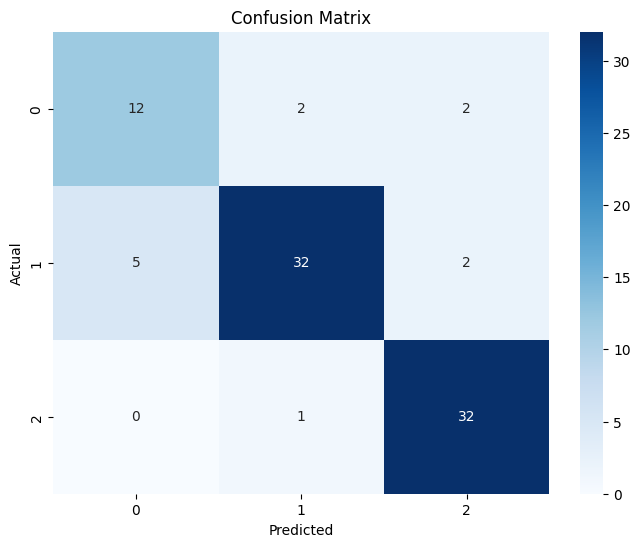

In [19]:
# Display confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Classify using Scikit learn (KNN)

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
model = KNeighborsClassifier(n_neighbors=5)

In [22]:
model.fit(X_train, y_train)

KNeighborsClassifier()

### Evaluation Metrics for Scikit Learn

In [23]:
y_pred_sklearn = model.predict(X_test)

In [24]:
# Calculate evaluation metrics for the scikit-learn model
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
precision_sklearn = precision_score(y_test, y_pred_sklearn, average='weighted')
recall_sklearn = recall_score(y_test, y_pred_sklearn, average='weighted')
f1_sklearn = f1_score(y_test, y_pred_sklearn, average='weighted')

In [25]:
print("Evaluation Metrics for Scikit-learn k-NN Model:")
print(f"Accuracy: {accuracy_sklearn:.4f}")
print(f"Precision: {precision_sklearn:.4f}")
print(f"Recall: {recall_sklearn:.4f}")
print(f"F1 Score: {f1_sklearn:.4f}")

Evaluation Metrics for Scikit-learn k-NN Model:
Accuracy: 0.8750
Precision: 0.8818
Recall: 0.8750
F1 Score: 0.8754


### Confusion Matrix for Scikit Learn Model

In [26]:
conf_matrix_sklearn = confusion_matrix(y_test, y_pred_sklearn)

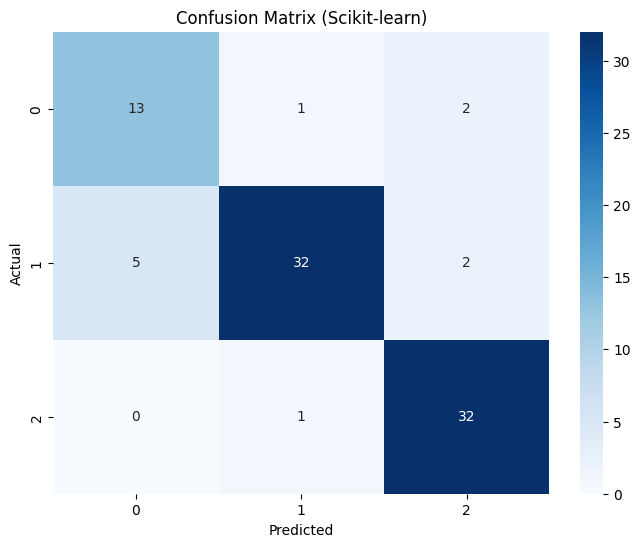

In [27]:
# Display confusion matrix for the scikit-learn model
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_sklearn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Scikit-learn)')
plt.show()